In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_excel('WaitData.Published 2.xlsx', sheet_name= 2)

In [3]:
df.head()

Wait       x_ArrivalDTTM     x_ScheduledDTTM         x_BeginDTTM  \
0     0 2025-08-02 16:47:44 2025-08-02 17:45:00 2025-08-02 17:45:03   
1    -3 2025-08-02 16:38:46 2025-08-02 17:15:00 2025-08-02 17:12:14   
2   -25 2025-08-02 16:29:25 2025-08-02 17:30:00 2025-08-02 17:05:15   
3    36 2025-08-02 16:16:24 2025-08-02 16:45:00 2025-08-02 17:21:55   
4   -21 2025-08-02 16:04:36 2025-08-02 17:15:00 2025-08-02 16:54:49   

   SumHowEarlyWaiting  AvgHowEarlyWaiting  LineCount0Strict  SumWaits  \
0                 372                  62                 6       249   
1                 335                  67                 3       195   
2                 274                  68                 4       150   
3                 369                  73                 2       179   
4                 438                  73                 5       192   

   LineCount0  LineCount1  ...  NumAddOnsToday  NumAddOnsLastW2  \
0           6           5  ...               4                2   
1           5           4  ...               4                1   
2           4           5  ...               4                1   
3           5           6  ...               3                1   
4           6           5  ...               3                0   

   NumScheduledNextSlot  NumScheduledNextW2  SumTimeToCompleteNextSlot  \
0                     0                   0                          0   
1                     2                   0                         32   
2                     1                   1                         13   
3                     2                   1                         45   
4                     2                   1                         32   

   SumTimeToCompleteNextW2  WithContrastCountWaiting  \
0                        0                         3   
1                        0                         2   
2                       16                         1   
3                       16                         3   
4                       15                         4   

   WithAndWithoutContrastCountWaiting  WithContrastCountInProgress  \
0                                   1                            1   
1                                   1                            2   
2                                   1                            3   
3                                   1                            1   
4                                   0                            0   

   WithAndWithoutContrastCountInProgress  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      1  

[5 rows x 89 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23583 entries, 0 to 23582
Data columns (total 89 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Wait                                   23583 non-null  int64         
 1   x_ArrivalDTTM                          23583 non-null  datetime64[ns]
 2   x_ScheduledDTTM                        23583 non-null  datetime64[ns]
 3   x_BeginDTTM                            23583 non-null  datetime64[ns]
 4   SumHowEarlyWaiting                     23583 non-null  int64         
 5   AvgHowEarlyWaiting                     23583 non-null  int64         
 6   LineCount0Strict                       23583 non-null  int64         
 7   SumWaits                               23583 non-null  int64         
 8   LineCount0                             23583 non-null  int64         
 9   LineCount1                             23583 non-null  int64 

In [5]:
df.iloc[0:44].isnull().sum()

Wait                                     0
x_ArrivalDTTM                            0
x_ScheduledDTTM                          0
x_BeginDTTM                              0
SumHowEarlyWaiting                       0
                                        ..
SumTimeToCompleteNextW2                  0
WithContrastCountWaiting                 0
WithAndWithoutContrastCountWaiting       0
WithContrastCountInProgress              0
WithAndWithoutContrastCountInProgress    0
Length: 89, dtype: int64

In [6]:
df.iloc[45:89].isnull().sum()

Wait                                     0
x_ArrivalDTTM                            0
x_ScheduledDTTM                          0
x_BeginDTTM                              0
SumHowEarlyWaiting                       0
                                        ..
SumTimeToCompleteNextW2                  0
WithContrastCountWaiting                 0
WithAndWithoutContrastCountWaiting       0
WithContrastCountInProgress              0
WithAndWithoutContrastCountInProgress    0
Length: 89, dtype: int64

In [7]:
df.columns

Index(['Wait', 'x_ArrivalDTTM', 'x_ScheduledDTTM', 'x_BeginDTTM',
       'SumHowEarlyWaiting', 'AvgHowEarlyWaiting', 'LineCount0Strict',
       'SumWaits', 'LineCount0', 'LineCount1', 'LineCount2', 'LineCount3',
       'LineCount4', 'FlowCount2', 'FlowCount4', 'SchFlowCount2',
       'SchFlowCount4', 'FutFlowCount2', 'FutFlowCount4', 'DelayCount',
       'DelayCountLastHour', 'mintime', 'maxtime', 'AheadCount',
       'ThoracicCount', 'PediatricCount', 'NeuroCount', 'AbdominalCount',
       'VascularCount', 'CardiacCount', 'MSKCount', 'NumScannersUsedToday',
       'SumInProgress', 'BeforeSlot', 'AfterSlot', 'Median5', 'MostRecent1',
       'MostRecent2', 'MostRecent3', 'MostRecent4', 'MostRecent5', 'StartTime',
       'StartTime2', 'StartTime3', 'StartTime4', 'IsLast', 'IsFirst',
       'NoneInProgress', 'NoneCompleted', 'NoneInLine',
       'SumWaitByTaskTypeLine', 'AvgWaitByTaskTypeLine',
       'SumTimeToCompleteInProgress', 'DelayedInLine',
       'SumDelayWaitingByExamCode', 'Sum

In [8]:
df.describe()

Wait                  x_ArrivalDTTM  \
count  23583.000000                          23583   
mean       8.399864  2024-09-14 04:59:21.841708032   
min     -497.000000            2023-10-06 08:12:31   
25%      -12.000000     2024-04-01 00:39:54.500000   
50%       12.000000            2024-09-20 14:39:07   
75%       34.000000     2025-03-03 11:53:29.500000   
max      360.000000            2025-08-02 16:47:44   
std       48.299114                            NaN   

                     x_ScheduledDTTM                    x_BeginDTTM  \
count                          23583                          23583   
mean   2024-09-14 05:49:17.486324992  2024-09-14 05:58:10.924394752   
min              2023-10-06 09:00:00            2023-10-06 09:17:00   
25%              2024-04-01 01:22:30            2024-04-01 01:38:38   
50%              2024-09-20 15:30:00            2024-09-20 15:46:06   
75%              2025-03-03 12:45:00            2025-03-03 13:04:35   
max              2025-08-02 17:45:00            2025-08-02 17:45:03   
std                              NaN                            NaN   

       SumHowEarlyWaiting  AvgHowEarlyWaiting  LineCount0Strict      SumWaits  \
count        23583.000000        23583.000000      23583.000000  23583.000000   
mean           328.280414           60.758937          3.693126    199.039308   
min           -150.000000          -82.000000          0.000000      0.000000   
25%            180.000000           45.000000          2.000000     95.000000   
50%            306.000000           60.000000          3.000000    175.000000   
75%            450.000000           75.000000          5.000000    279.000000   
max           1563.000000          487.000000         14.000000   1032.000000   
std            203.227527           28.412621          2.506477    140.087363   

         LineCount0    LineCount1  ...  NumAddOnsToday  NumAddOnsLastW2  \
count  23583.000000  23583.000000  ...    23583.000000     23583.000000   
mean       5.264089      5.195056  ...        1.538820         0.599627   
min        0.000000      0.000000  ...        0.000000         0.000000   
25%        3.000000      3.000000  ...        0.000000         0.000000   
50%        5.000000      5.000000  ...        1.000000         0.000000   
75%        7.000000      7.000000  ...        2.000000         1.000000   
max       17.000000     18.000000  ...       13.000000         7.000000   
std        2.610587      2.684927  ...        2.037477         0.886572   

       NumScheduledNextSlot  NumScheduledNextW2  SumTimeToCompleteNextSlot  \
count          23583.000000        23583.000000               23583.000000   
mean               1.683119            1.984777                  28.728915   
min                0.000000            0.000000                   0.000000   
25%                1.000000            1.000000                  17.000000   
50%                2.000000            2.000000                  30.000000   
75%                2.000000            3.000000                  35.000000   
max                6.000000            8.000000                 121.000000   
std                0.558773            1.381474                  10.807578   

       SumTimeToCompleteNextW2  WithContrastCountWaiting  \
count             23583.000000              23583.000000   
mean                 32.245007                  3.651529   
min                   0.000000                  0.000000   
25%                  16.000000                  2.000000   
50%                  30.000000                  4.000000   
75%                  47.000000                  5.000000   
max                 136.000000                 13.000000   
std                  22.962655                  2.095205   

       WithAndWithoutContrastCountWaiting  WithContrastCountInProgress  \
count                        23583.000000                 23583.000000   
mean                             0.536107                     0.863164   
min             

In [9]:
columns = ['Wait', 'x_ArrivalDTTM', 'x_ScheduledDTTM', 'x_BeginDTTM',
       'SumHowEarlyWaiting', 'AvgHowEarlyWaiting', 'LineCount0Strict',
       'SumWaits', 'LineCount0', 'LineCount1', 'LineCount2', 'LineCount3',
       'LineCount4', 'FlowCount2', 'FlowCount4', 'SchFlowCount2',
       'SchFlowCount4', 'FutFlowCount2', 'FutFlowCount4', 'DelayCount',
       'DelayCountLastHour', 'mintime', 'maxtime', 'AheadCount',
       'ThoracicCount', 'PediatricCount', 'NeuroCount', 'AbdominalCount',
       'VascularCount', 'CardiacCount', 'MSKCount', 'NumScannersUsedToday',
       'SumInProgress', 'BeforeSlot', 'AfterSlot', 'Median5', 'MostRecent1',
       'MostRecent2', 'MostRecent3', 'MostRecent4', 'MostRecent5', 'StartTime',
       'StartTime2', 'StartTime3', 'StartTime4']
columns1 = ['Wait', 'x_ArrivalDTTM', 'x_ScheduledDTTM', 'x_BeginDTTM',
       'SumHowEarlyWaiting', 'AvgHowEarlyWaiting']
columns12 = ['LineCount0Strict', 'LineCount0', 'LineCount1', 'LineCount2', 'LineCount3',
       'LineCount4', 'FlowCount2', 'FlowCount4']
columns2 = ['SchFlowCount2',
       'SchFlowCount4', 'FutFlowCount2', 'FutFlowCount4',
       'DelayCountLastHour',
       'ThoracicCount', 'PediatricCount', 'NeuroCount', 'AbdominalCount',
       'VascularCount', 'CardiacCount']
columns3 = ['MSKCount', 'NumScannersUsedToday',
       'SumInProgress', 'BeforeSlot', 'AfterSlot', 'Median5', 'MostRecent1',
       'MostRecent2', 'MostRecent3', 'MostRecent4', 'MostRecent5']


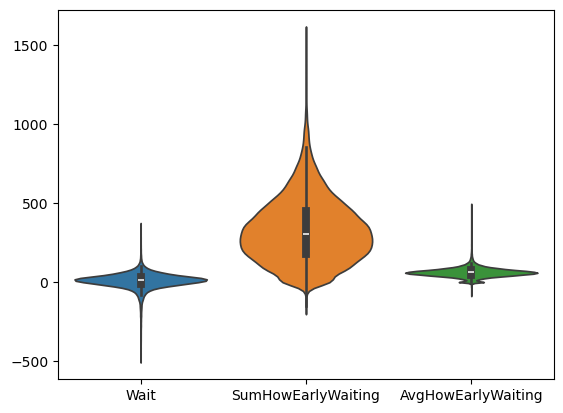

In [10]:
sns.violinplot(df[columns1])
plt.show()

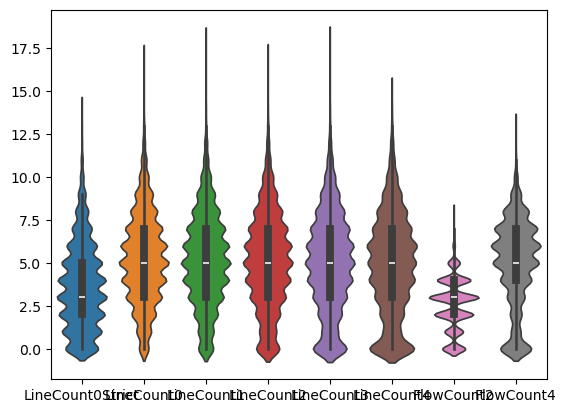

In [11]:
sns.violinplot(df[columns12])
plt.show()

<Axes: ylabel='SumWaits'>

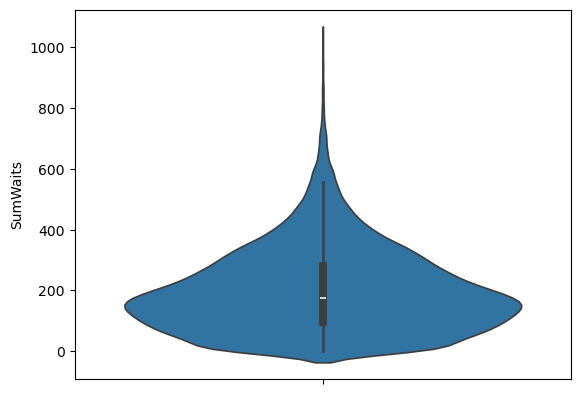

In [12]:
sns.violinplot(df['SumWaits'])

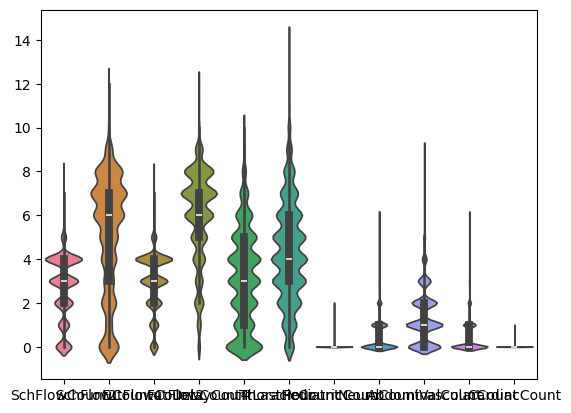

In [13]:
sns.violinplot(df[columns2])
plt.show()

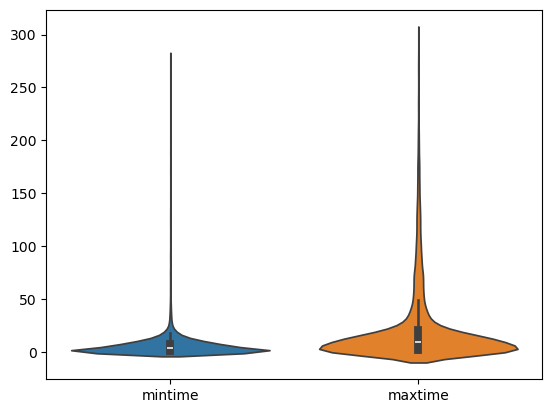

In [14]:
sns.violinplot(df[['mintime','maxtime']])
plt.show()

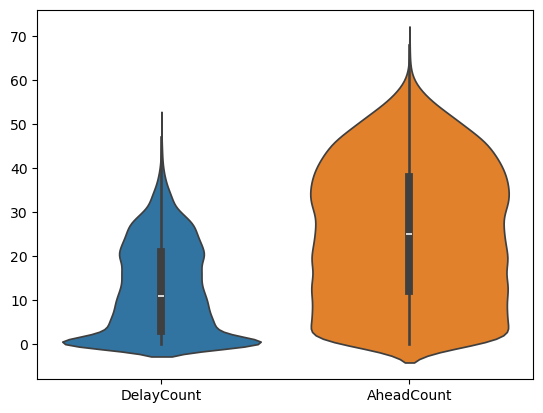

In [15]:
sns.violinplot(df[['DelayCount','AheadCount']])
plt.show()

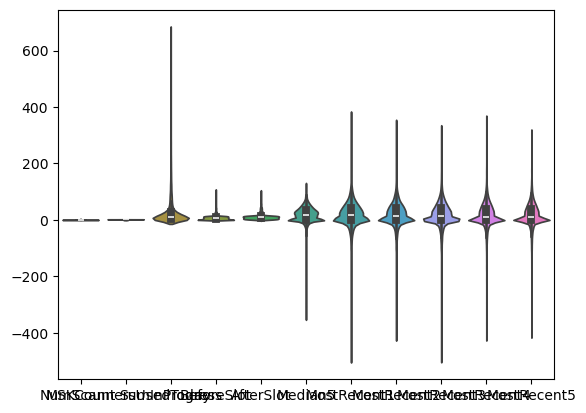

In [16]:
sns.violinplot(df[columns3])
plt.show()

<Axes: >

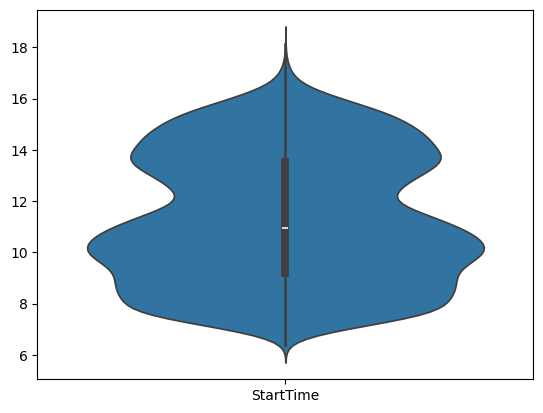

In [17]:
sns.violinplot(df[['StartTime',
       ]])

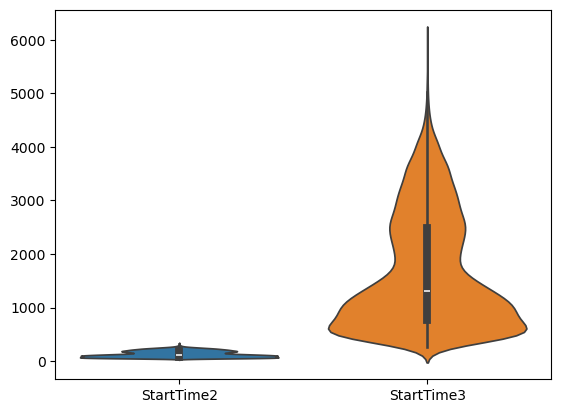

In [18]:
sns.violinplot(df[['StartTime2', 'StartTime3']])
plt.show()

<Axes: ylabel='StartTime4'>

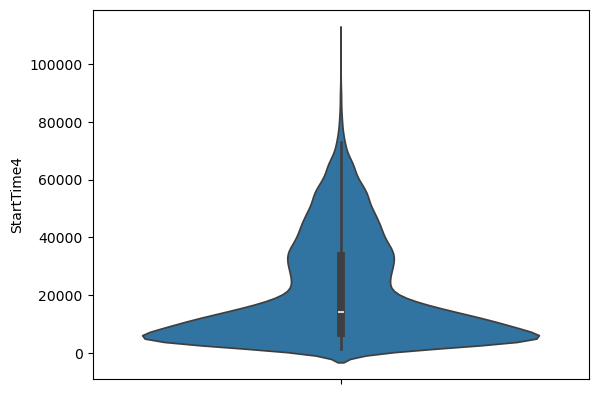

In [19]:
sns.violinplot(df['StartTime4'])

In [20]:
columns = ['IsLast', 'IsFirst',
       'NoneInProgress', 'NoneCompleted', 'NoneInLine',
       'SumWaitByTaskTypeLine', 'AvgWaitByTaskTypeLine',
       'SumTimeToCompleteInProgress', 'DelayedInLine',
       'SumDelayWaitingByExamCode', 'SumDelayWaitingInLine',
       'SumDelayInProgress', 'ExpectedDelayNextExam', 'AvgAgePeopleWaiting',
       'DayOfWeek', 'Month', 'DayOfYear', 'InProgressSize',
       'AvgWaitLastK1Customers', 'AvgWaitLastK2Customers',
       'AvgWaitLastK3Customers', 'NumCompletedToday', 'NumCompletedInLastW1',
       'NumCompletedInLastW2', 'NumCompletedInLastW3', 'NumCustomersInLastW1',
       'NumCustomersInLastW2', 'NumCustomersInLastW3', 'AvgWaitLastW1',
       'AvgWaitLastW2', 'AvgWaitLastW3', 'AvgDelayForDay',
       'OutpatientWaitingCount', 'MalesWaitingCount', 'NumAddOnsToday',
       'NumAddOnsLastW2', 'NumScheduledNextSlot', 'NumScheduledNextW2',
       'SumTimeToCompleteNextSlot', 'SumTimeToCompleteNextW2',
       'WithContrastCountWaiting', 'WithAndWithoutContrastCountWaiting',
       'WithContrastCountInProgress', 'WithAndWithoutContrastCountInProgress']
columns4 = [
       'SumWaitByTaskTypeLine', 'AvgWaitByTaskTypeLine',
       'SumTimeToCompleteInProgress', 'DelayedInLine',
       'SumDelayWaitingByExamCode', 'SumDelayWaitingInLine',
       'SumDelayInProgress', 'ExpectedDelayNextExam', 'AvgAgePeopleWaiting']
columns5 = ['DayOfWeek', 'Month', 'InProgressSize',
       'AvgWaitLastK1Customers', 'AvgWaitLastK2Customers',
       'AvgWaitLastK3Customers', 'NumCompletedToday', 'NumCompletedInLastW1',
       'NumCompletedInLastW2', 'NumCompletedInLastW3', 'NumCustomersInLastW1',
       'NumCustomersInLastW2', 'NumCustomersInLastW3', 'AvgWaitLastW1']
columns6 = ['AvgWaitLastW2', 'AvgWaitLastW3',
       'OutpatientWaitingCount', 'MalesWaitingCount', 'NumAddOnsToday',
       'NumAddOnsLastW2', 'NumScheduledNextSlot', 'NumScheduledNextW2',
       'SumTimeToCompleteNextSlot', 'SumTimeToCompleteNextW2',
       'WithContrastCountWaiting', 'WithAndWithoutContrastCountWaiting',
       'WithContrastCountInProgress', 'WithAndWithoutContrastCountInProgress']

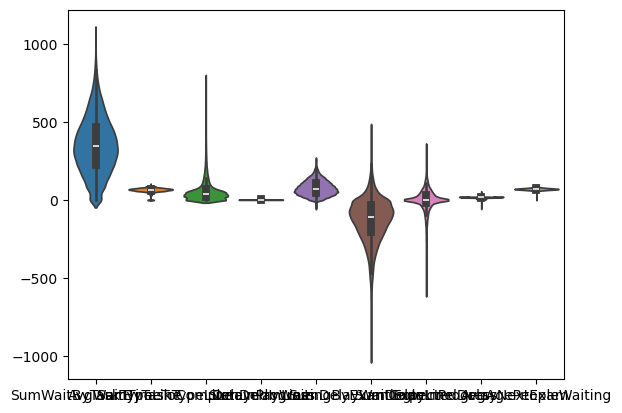

In [21]:
sns.violinplot(df[columns4])
plt.show()

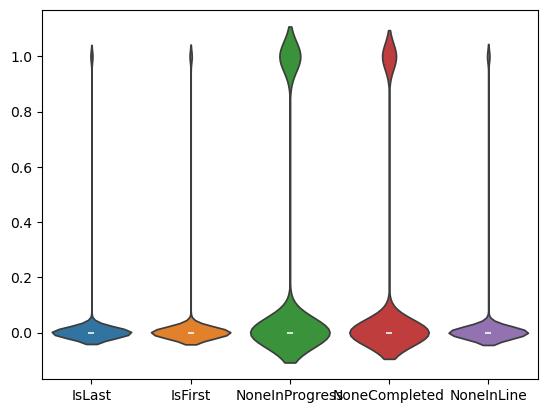

In [22]:
sns.violinplot(df[['IsLast', 'IsFirst',
       'NoneInProgress', 'NoneCompleted', 'NoneInLine']])
plt.show()

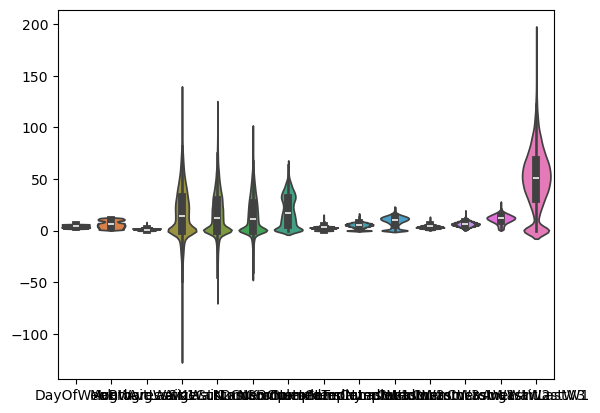

In [23]:
sns.violinplot(df[columns5])
plt.show()

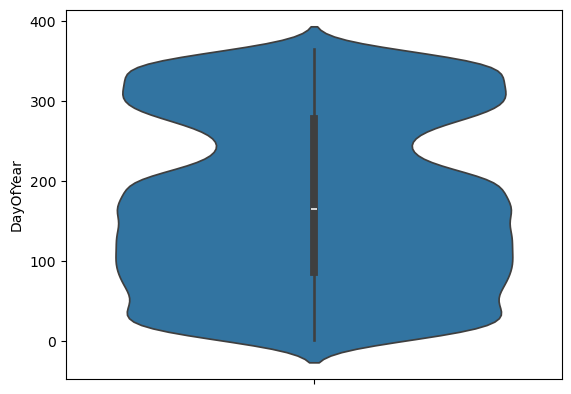

In [24]:
sns.violinplot(df['DayOfYear'])
plt.show()

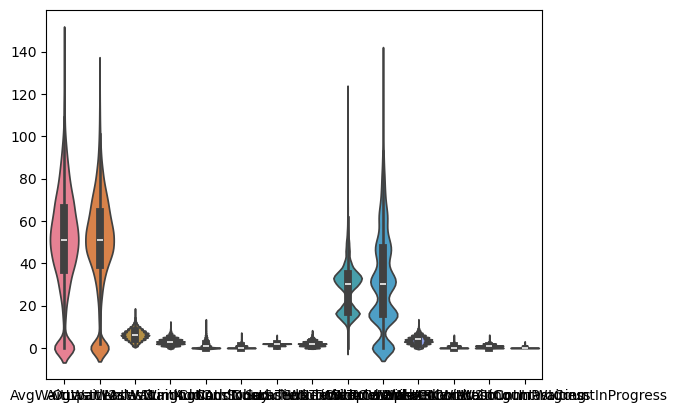

In [25]:
sns.violinplot(df[columns6])
plt.show()

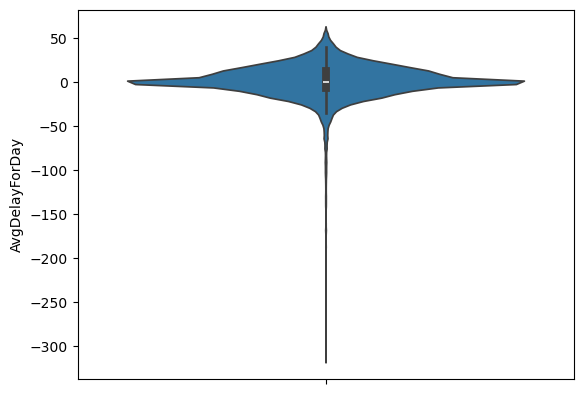

In [26]:
sns.violinplot(df['AvgDelayForDay'])
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23583 entries, 0 to 23582
Data columns (total 89 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Wait                                   23583 non-null  int64         
 1   x_ArrivalDTTM                          23583 non-null  datetime64[ns]
 2   x_ScheduledDTTM                        23583 non-null  datetime64[ns]
 3   x_BeginDTTM                            23583 non-null  datetime64[ns]
 4   SumHowEarlyWaiting                     23583 non-null  int64         
 5   AvgHowEarlyWaiting                     23583 non-null  int64         
 6   LineCount0Strict                       23583 non-null  int64         
 7   SumWaits                               23583 non-null  int64         
 8   LineCount0                             23583 non-null  int64         
 9   LineCount1                             23583 non-null  int64 

In [28]:
df.columns

Index(['Wait', 'x_ArrivalDTTM', 'x_ScheduledDTTM', 'x_BeginDTTM',
       'SumHowEarlyWaiting', 'AvgHowEarlyWaiting', 'LineCount0Strict',
       'SumWaits', 'LineCount0', 'LineCount1', 'LineCount2', 'LineCount3',
       'LineCount4', 'FlowCount2', 'FlowCount4', 'SchFlowCount2',
       'SchFlowCount4', 'FutFlowCount2', 'FutFlowCount4', 'DelayCount',
       'DelayCountLastHour', 'mintime', 'maxtime', 'AheadCount',
       'ThoracicCount', 'PediatricCount', 'NeuroCount', 'AbdominalCount',
       'VascularCount', 'CardiacCount', 'MSKCount', 'NumScannersUsedToday',
       'SumInProgress', 'BeforeSlot', 'AfterSlot', 'Median5', 'MostRecent1',
       'MostRecent2', 'MostRecent3', 'MostRecent4', 'MostRecent5', 'StartTime',
       'StartTime2', 'StartTime3', 'StartTime4', 'IsLast', 'IsFirst',
       'NoneInProgress', 'NoneCompleted', 'NoneInLine',
       'SumWaitByTaskTypeLine', 'AvgWaitByTaskTypeLine',
       'SumTimeToCompleteInProgress', 'DelayedInLine',
       'SumDelayWaitingByExamCode', 'Sum

In [29]:
columns = ['Wait', 'x_ArrivalDTTM', 'x_ScheduledDTTM', 'x_BeginDTTM',
       'SumHowEarlyWaiting', 'AvgHowEarlyWaiting', 'LineCount0Strict',
       'SumWaits', 'LineCount0', 'LineCount1', 'LineCount2', 'LineCount3',
       'LineCount4', 'FlowCount2', 'FlowCount4', 'SchFlowCount2',
       'SchFlowCount4', 'FutFlowCount2', 'FutFlowCount4', 'DelayCount',
       'DelayCountLastHour', 'mintime', 'maxtime', 'AheadCount',
       'ThoracicCount', 'PediatricCount', 'NeuroCount', 'AbdominalCount',
       'VascularCount', 'CardiacCount', 'MSKCount', 'NumScannersUsedToday',
       'SumInProgress', 'BeforeSlot', 'AfterSlot', 'Median5', 'MostRecent1',
       'MostRecent2', 'MostRecent3', 'MostRecent4', 'MostRecent5', 'StartTime',
       'StartTime2', 'StartTime3', 'StartTime4']

In [30]:
columns2 = ['Wait', 'IsLast', 'IsFirst',
       'NoneInProgress', 'NoneCompleted', 'NoneInLine',
       'SumWaitByTaskTypeLine', 'AvgWaitByTaskTypeLine',
       'SumTimeToCompleteInProgress', 'DelayedInLine',
       'SumDelayWaitingByExamCode', 'SumDelayWaitingInLine',
       'SumDelayInProgress', 'ExpectedDelayNextExam', 'AvgAgePeopleWaiting',
       'DayOfWeek', 'Month', 'DayOfYear', 'InProgressSize',
       'AvgWaitLastK1Customers', 'AvgWaitLastK2Customers',
       'AvgWaitLastK3Customers', 'NumCompletedToday', 'NumCompletedInLastW1',
       'NumCompletedInLastW2', 'NumCompletedInLastW3', 'NumCustomersInLastW1',
       'NumCustomersInLastW2', 'NumCustomersInLastW3', 'AvgWaitLastW1',
       'AvgWaitLastW2', 'AvgWaitLastW3', 'AvgDelayForDay',
       'OutpatientWaitingCount', 'MalesWaitingCount', 'NumAddOnsToday',
       'NumAddOnsLastW2', 'NumScheduledNextSlot', 'NumScheduledNextW2',
       'SumTimeToCompleteNextSlot', 'SumTimeToCompleteNextW2',
       'WithContrastCountWaiting', 'WithAndWithoutContrastCountWaiting',
       'WithContrastCountInProgress', 'WithAndWithoutContrastCountInProgress']

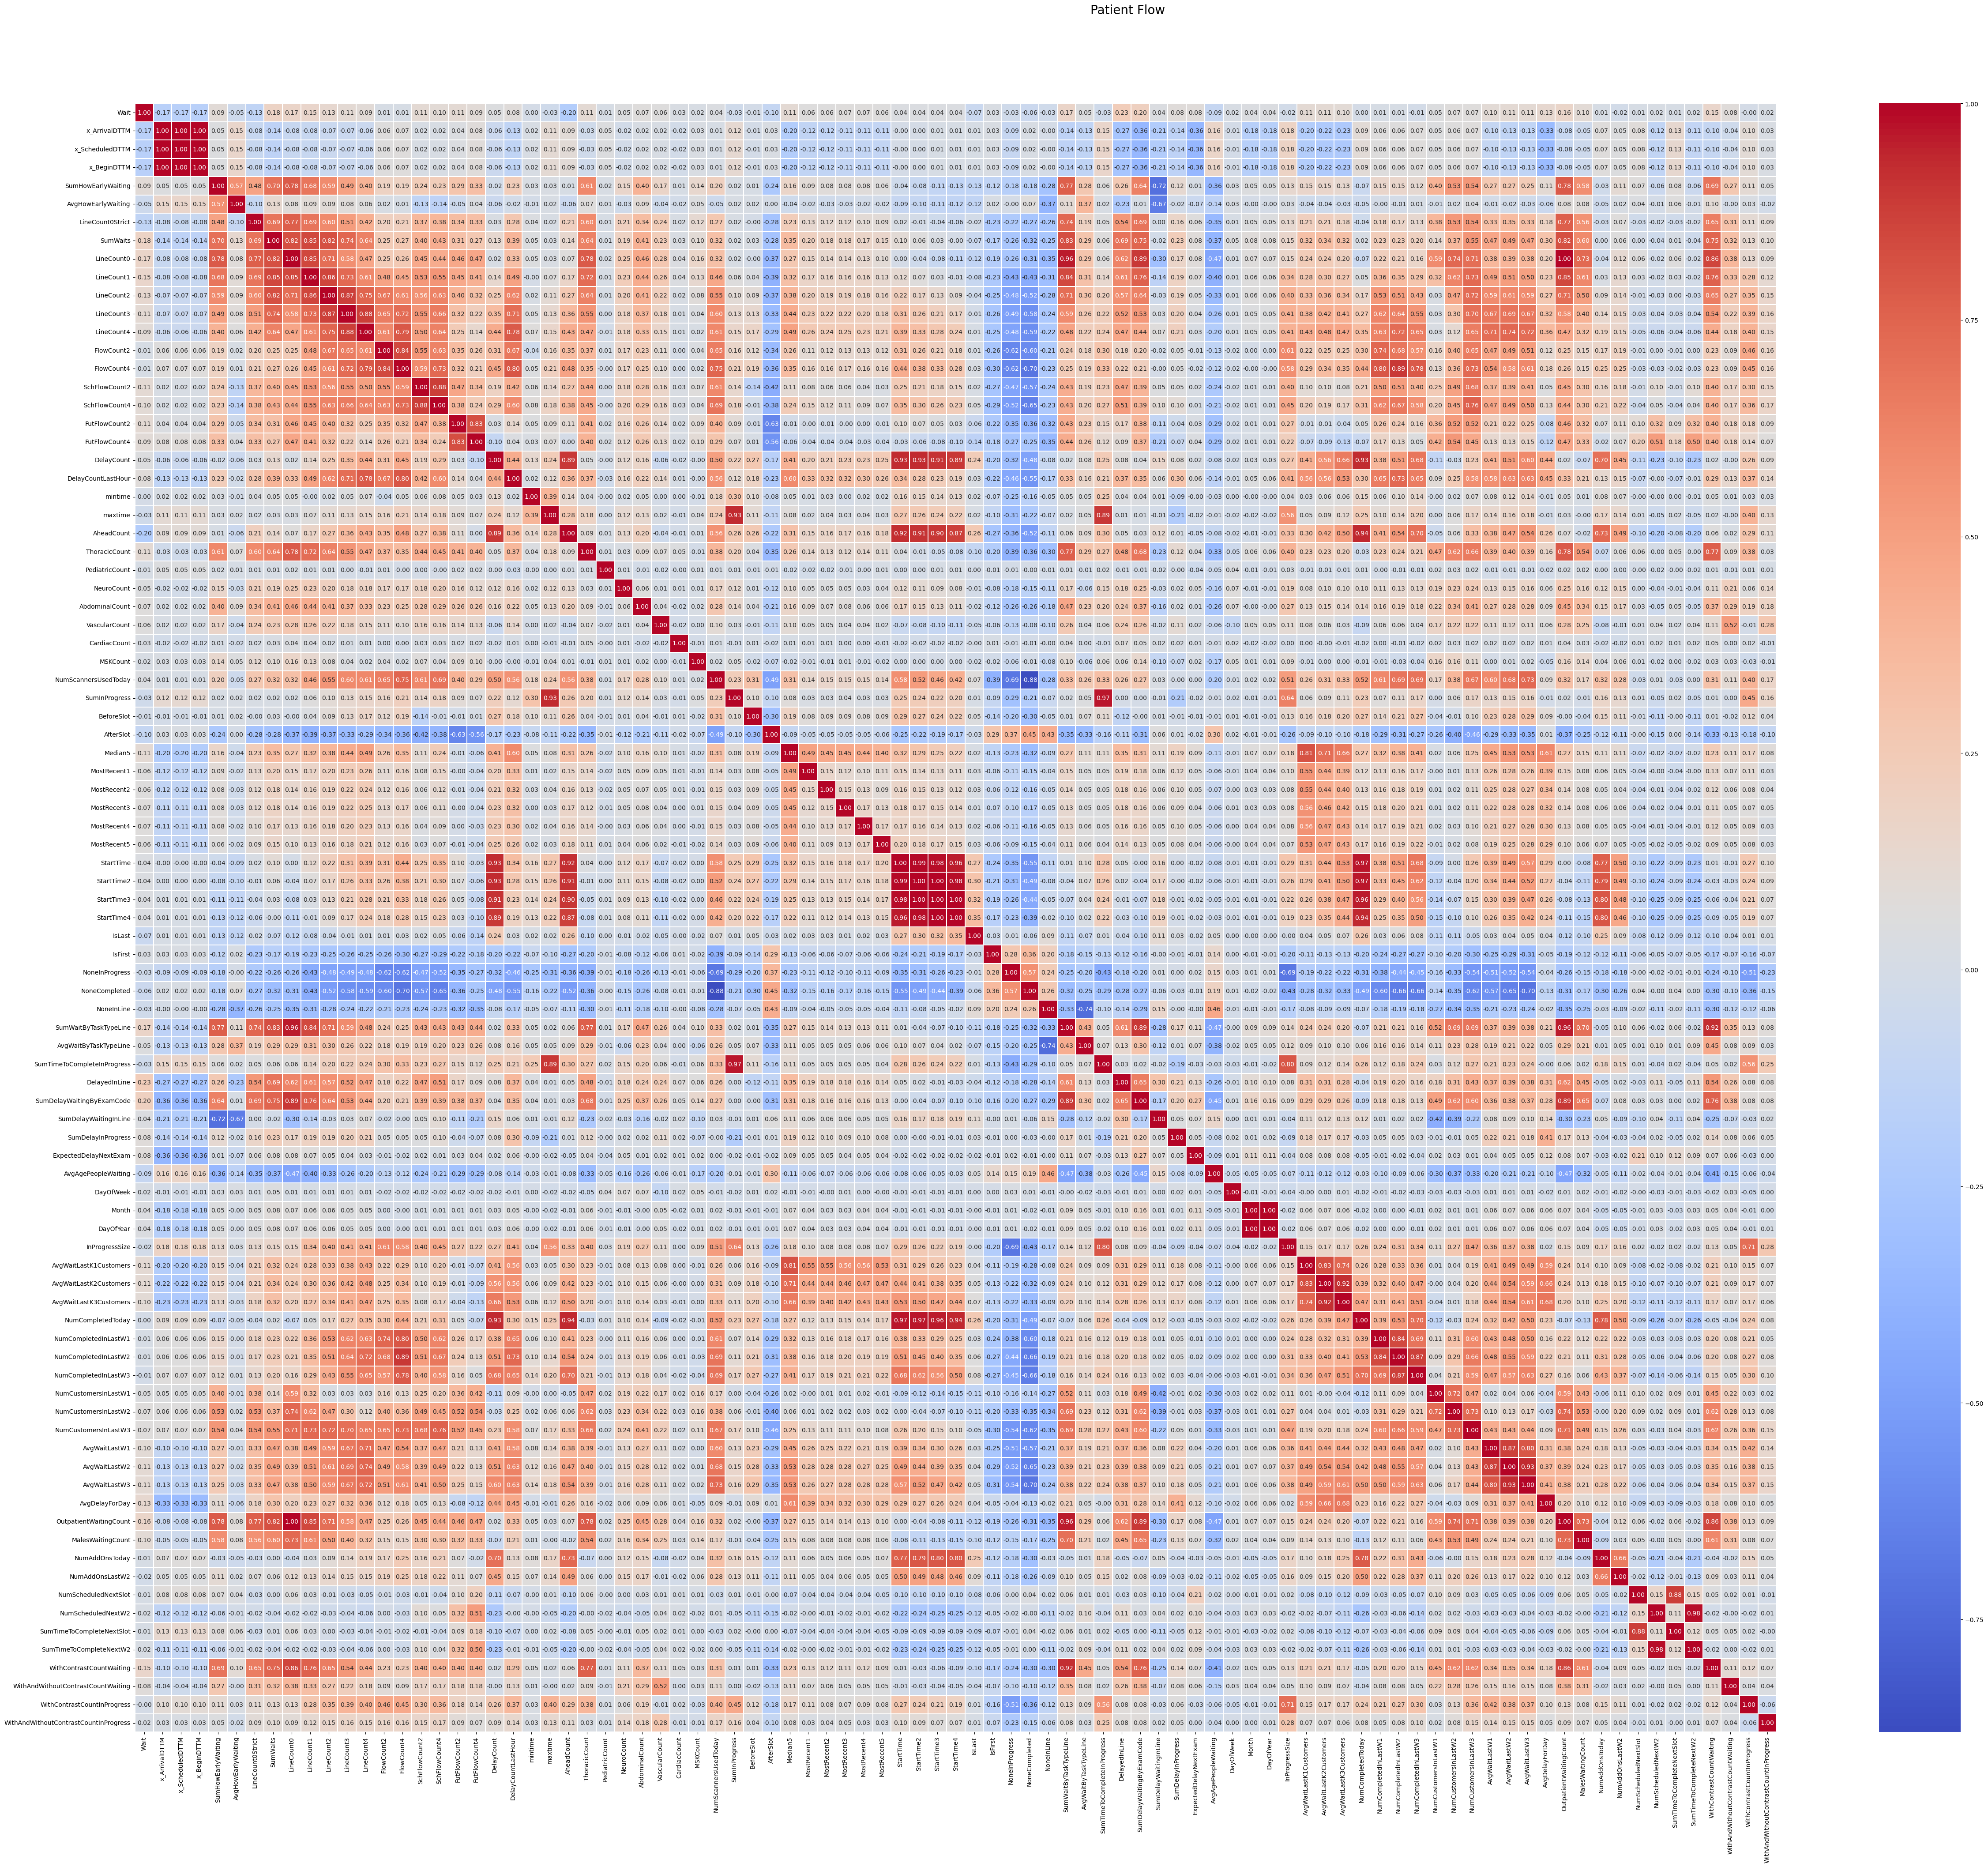

In [31]:
corr2 = df.corr()
f, ax = plt.subplots(figsize=(60, 45))
hm = sns.heatmap(round(corr2, 2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Patient Flow', fontsize=20)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23583 entries, 0 to 23582
Data columns (total 89 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Wait                                   23583 non-null  int64         
 1   x_ArrivalDTTM                          23583 non-null  datetime64[ns]
 2   x_ScheduledDTTM                        23583 non-null  datetime64[ns]
 3   x_BeginDTTM                            23583 non-null  datetime64[ns]
 4   SumHowEarlyWaiting                     23583 non-null  int64         
 5   AvgHowEarlyWaiting                     23583 non-null  int64         
 6   LineCount0Strict                       23583 non-null  int64         
 7   SumWaits                               23583 non-null  int64         
 8   LineCount0                             23583 non-null  int64         
 9   LineCount1                             23583 non-null  int64 

In [33]:
columns = ['SumHowEarlyWaiting', 'LineCount0Strict', 'LineCount0', 'LineCount1', 'LineCount2', 'LineCount3', 'LineCount4', 'ThoracicCount', 'AbdominalCount', 'SumWaitByTaskTypeLine', 'DelayedInLine', 'SumDelayWaitingByExamCode', 'NumCustomersInLastW3', 'AvgWaitLastW1', 'AvgWaitLastW2', 'AvgWaitLastW3', 'OutpatientWaitingCount', 'MalesWaitingCount', 'WithContrastCountWaiting', 'SumWaits']
df2 = df[columns]

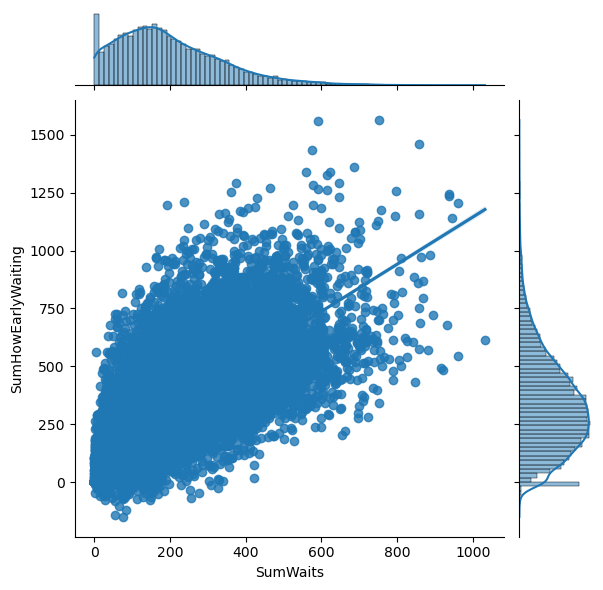

In [34]:
sns.jointplot(x='SumWaits', y='SumHowEarlyWaiting', data=df, kind='reg')
plt.show()

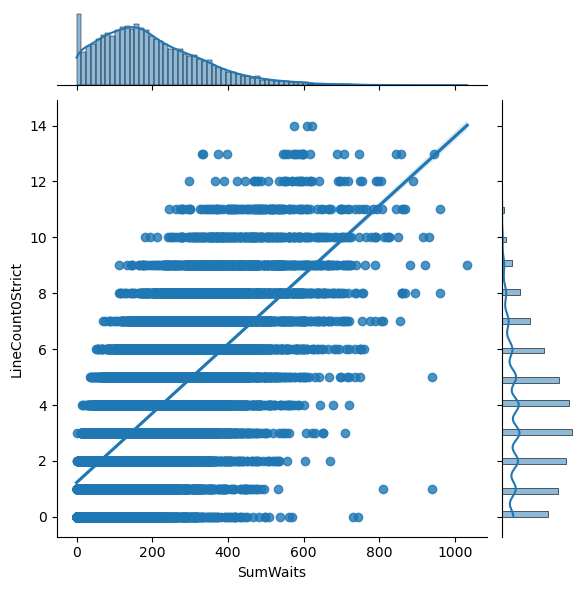

In [35]:
sns.jointplot(x='SumWaits', y='LineCount0Strict', data=df, kind='reg')
plt.show()

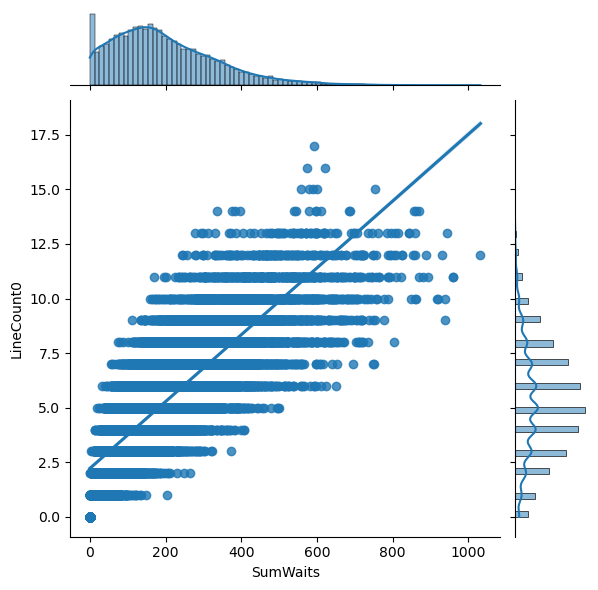

In [36]:
sns.jointplot(x='SumWaits', y='LineCount0', data=df, kind='reg')
plt.show()

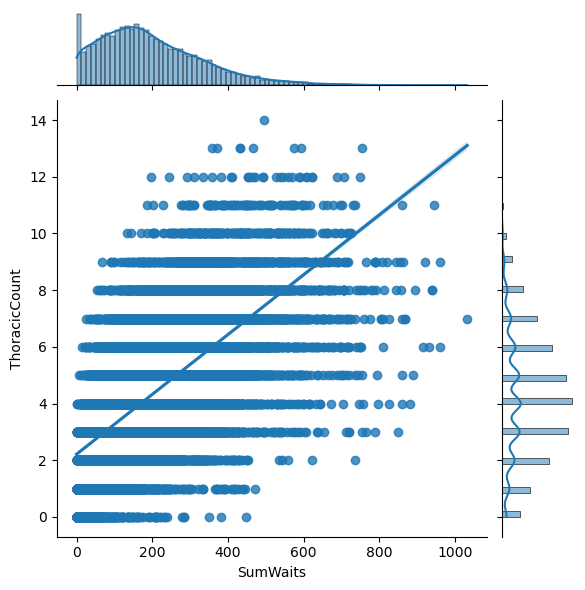

In [37]:
sns.jointplot(x='SumWaits', y='ThoracicCount', data=df, kind='reg')
plt.show()

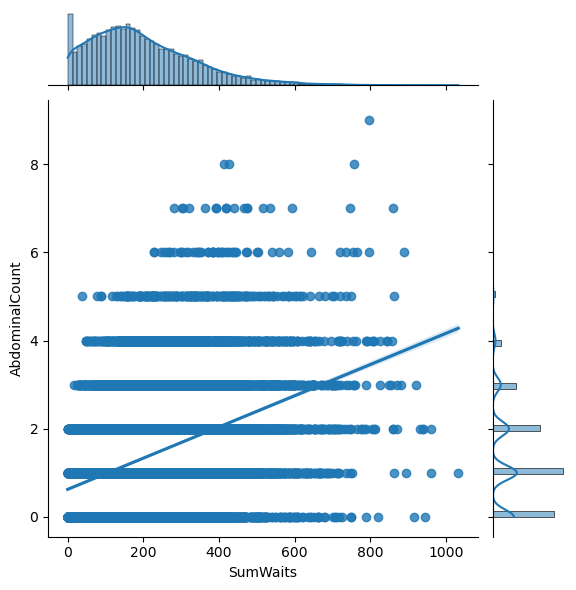

In [38]:
sns.jointplot(x='SumWaits', y='AbdominalCount', data=df, kind='reg')
plt.show()

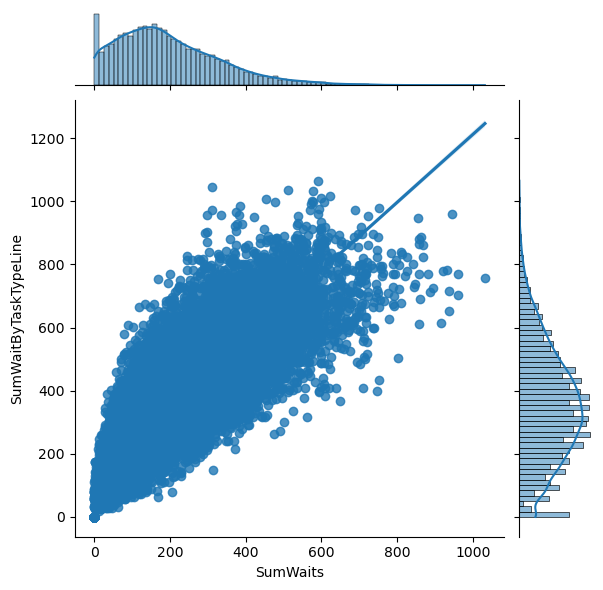

In [39]:
sns.jointplot(x='SumWaits', y='SumWaitByTaskTypeLine', data=df, kind='reg')
plt.show()

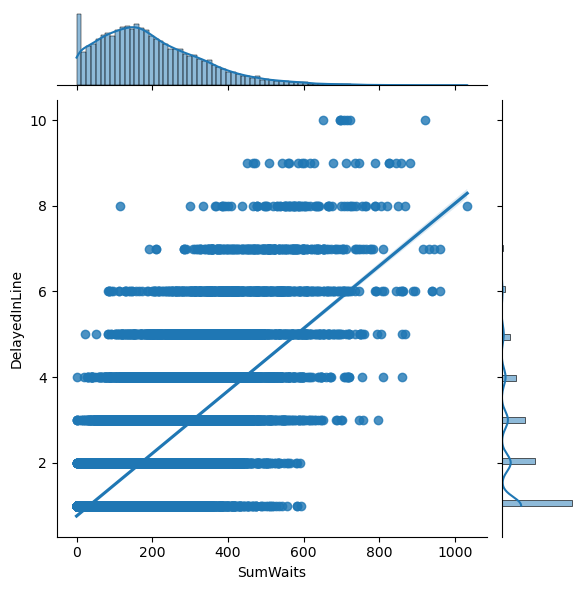

In [40]:
sns.jointplot(x='SumWaits', y='DelayedInLine', data=df, kind='reg')
plt.show()

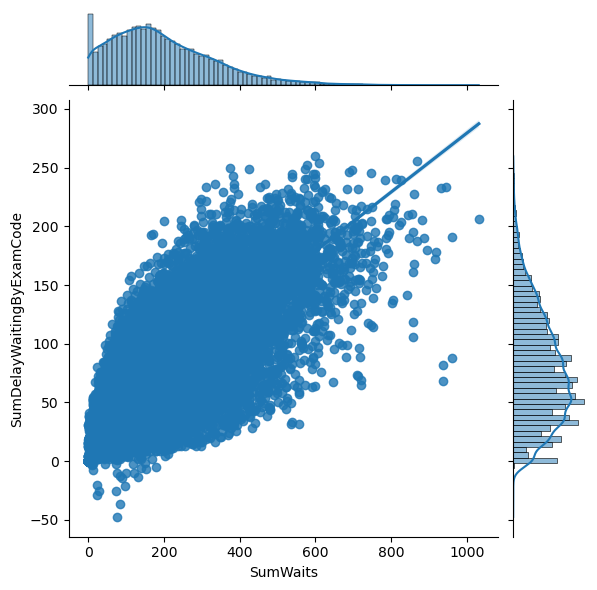

In [41]:
sns.jointplot(x='SumWaits', y='SumDelayWaitingByExamCode', data=df, kind='reg')
plt.show()

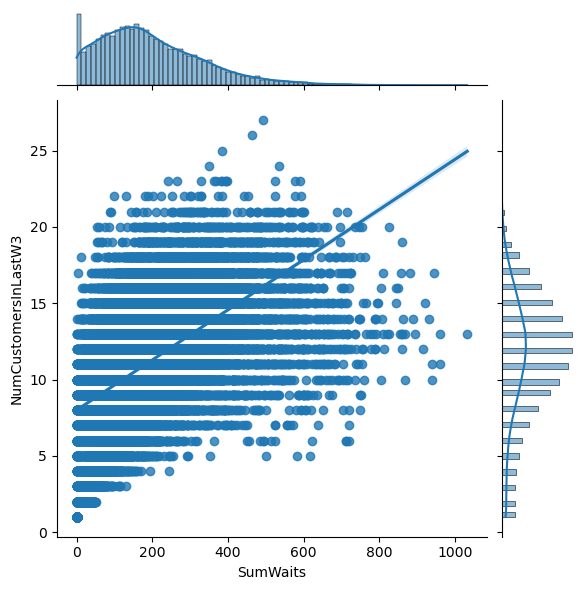

In [42]:
sns.jointplot(x='SumWaits', y='NumCustomersInLastW3', data=df, kind='reg')
plt.show()

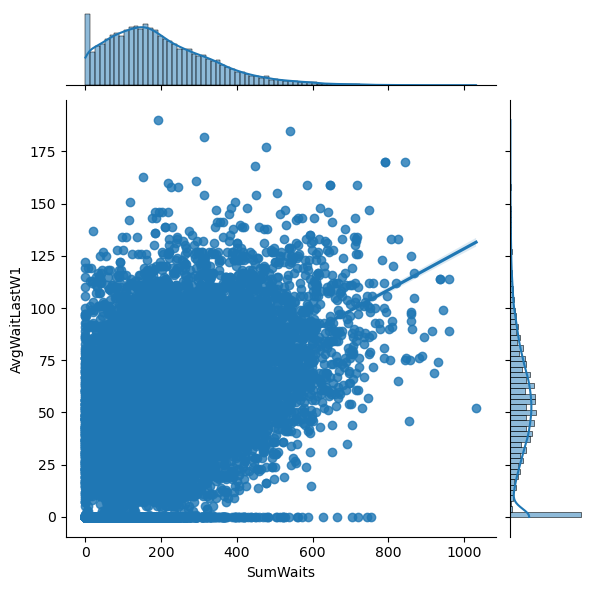

In [43]:
sns.jointplot(x='SumWaits', y='AvgWaitLastW1', data=df, kind='reg')
plt.show()

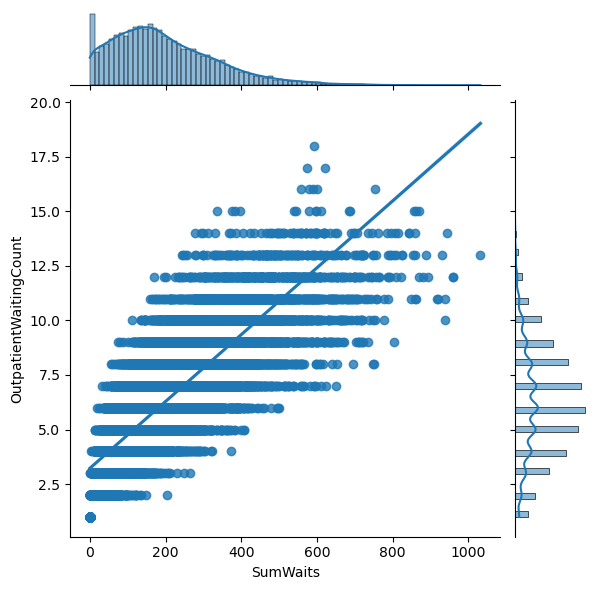

In [44]:
sns.jointplot(x='SumWaits', y='OutpatientWaitingCount', data=df, kind='reg')
plt.show()

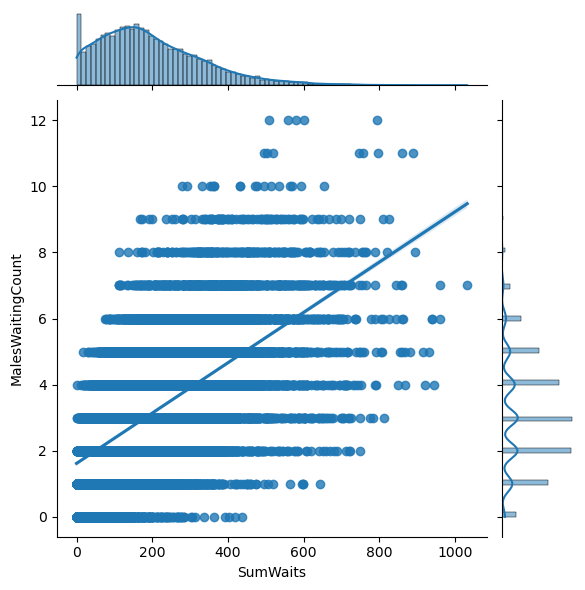

In [45]:
sns.jointplot(x='SumWaits', y='MalesWaitingCount', data=df, kind='reg')
plt.show()

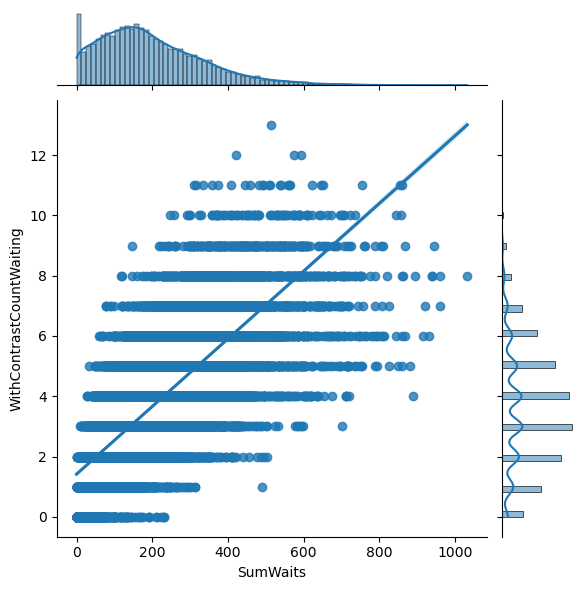

In [46]:
sns.jointplot(x='SumWaits', y='WithContrastCountWaiting', data=df, kind='reg')
plt.show()

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23583 entries, 0 to 23582
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SumHowEarlyWaiting         23583 non-null  int64  
 1   LineCount0Strict           23583 non-null  int64  
 2   LineCount0                 23583 non-null  int64  
 3   LineCount1                 23583 non-null  int64  
 4   LineCount2                 23583 non-null  int64  
 5   LineCount3                 23583 non-null  int64  
 6   LineCount4                 23583 non-null  int64  
 7   ThoracicCount              23583 non-null  int64  
 8   AbdominalCount             23583 non-null  int64  
 9   SumWaitByTaskTypeLine      23583 non-null  int64  
 10  DelayedInLine              23583 non-null  int64  
 11  SumDelayWaitingByExamCode  23583 non-null  float64
 12  NumCustomersInLastW3       23583 non-null  int64  
 13  AvgWaitLastW1              23583 non-null  int

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df2.drop('SumWaits', axis=1)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif

Variable         VIF
0          SumHowEarlyWaiting   15.542638
1            LineCount0Strict    9.200910
2                  LineCount0  454.487180
3                  LineCount1   32.893608
4                  LineCount2   32.416014
5                  LineCount3   33.128075
6                  LineCount4   22.075483
7               ThoracicCount   20.246770
8              AbdominalCount    4.583146
9       SumWaitByTaskTypeLine  158.536925
10              DelayedInLine    8.609227
11  SumDelayWaitingByExamCode   23.375697
12       NumCustomersInLastW3   28.912862
13              AvgWaitLastW1   17.199504
14              AvgWaitLastW2   54.763057
15              AvgWaitLastW3   40.678414
16     OutpatientWaitingCount  500.560072
17          MalesWaitingCount    8.789568
18   WithContrastCountWaiting   33.743779

In [49]:
df2 = df2.drop(['OutpatientWaitingCount', 'LineCount0'], axis=1)

In [50]:
df2

SumHowEarlyWaiting  LineCount0Strict  LineCount1  LineCount2  \
0                     372                 6           5           6   
1                     335                 3           4           6   
2                     274                 4           5           6   
3                     369                 2           6           4   
4                     438                 5           5           5   
...                   ...               ...         ...         ...   
23578                 239                 0           4           1   
23579                 174                 3           1           0   
23580                 122                 2           1           0   
23581                  78                 0           1           0   
23582                   0                 0           0           0   

       LineCount3  LineCount4  ThoracicCount  AbdominalCount  \
0               6           4              4               1   
1               6           5              4               1   
2               4           6              3               2   
3               5           5              4               1   
4               6           5              4               1   
...           ...         ...            ...             ...   
23578           1           0              3               1   
23579           0           0              3               0   
23580           0           0              2               0   
23581           0           0              1               0   
23582           0           0              0               0   

       SumWaitByTaskTypeLine  DelayedInLine  SumDelayWaitingByExamCode  \
0                        338              2                  71.966675   
1                        282              1                  56.694694   
2                        226              1                  41.422713   
3                        309              1                  54.146795   
4                        338              1                  59.546638   
...                      ...            ...                        ...   
23578                    294              1                  64.582116   
23579                    208              1                  47.593895   
23580                    120              1                  29.306423   
23581                     88              1                  18.287472   
23582                      0              1                   0.000000   

       NumCustomersInLastW3  AvgWaitLastW1  AvgWaitLastW2  AvgWaitLastW3  \
0                        12             43             45             53   
1                        11             36             52             53   
2                        11             41             52             48   
3                        12             46             56             46   
4                        13             72             62             48   
...                     ...            ...            ...            ...   
23578                     5              0              0              0   
23579                     4              0              0              0   
23580                     3              0              0              0   
23581                     2              0              0              0   
23582                     1              0              0              0   

       MalesWaitingCount  WithContrastCountWaiting  SumWaits  
0                      3                         3       249  
1                      2                         2       195  
2                      1                         1       150  
3                      3                         3       179  
4                      4                         4       192  
...                  ...                       ...       ...  
23578                  2                         3       115  
23579                  2                         2        39  
23580           

In [51]:
X=df2.drop('SumWaits', axis=1)
y=df2['SumWaits']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [52]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = lnr.predict(X_test)

In [54]:
print('The Mean Squared Error: ' , mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('The Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

The Mean Squared Error:  1755.3161645561645
The Mean Absolute Error:  31.283415379385602
The Root Mean Squared Error:  41.89649346372754


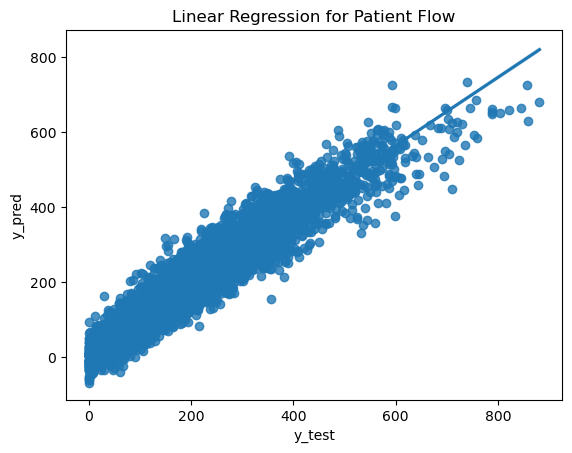

In [55]:
sns.regplot(x=y_test, y=y_pred)
plt.title('Linear Regression for Patient Flow')

plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [56]:
X2=df2.drop('SumWaits', axis=1)
y=df2['SumWaits']
X = sm.add_constant(X2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [57]:
ols = sm.OLS(y_train, X_train)
ols2 = ols.fit()

In [58]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SumWaits   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:53:34   Log-Likelihood:                -91584.
No. Observations:               17687   AIC:                         1.832e+05
Df Residuals:                   17669   BIC:                         1.833e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.4707      1.095     -2.256      0.024      -4.617      -0.325
SumHowEarlyWaiting            0.1552      0.003     51.739      0.000       0.149       0.161
LineCount0Strict              6.3521      0.202     31.520      0.000       5.957       6.747
LineCount1                   11.5300      0.312     36.957      0.000      10.918      12.141
LineCount2                   10.0258      0.315     31.791      0.000       9.408      10.644
LineCount3                    8.1618      0.324     25.155      0.000       7.526       8.798
LineCount4                    9.5393      0.268     35.619      0.000       9.014      10.064
ThoracicCount                -3.2418      0.291    -11.157      0.000      -3.811      -2.672
AbdominalCount               -1.8754      0.384     -4.885      0.000      -2.628      -1.123
SumWaitByTaskTypeLine         0.2340      0.009     26.385      0.000       0.217       0.251
DelayedInLine                20.1214      0.339     59.318      0.000      19.456      20.786
SumDelayWaitingByExamCode    -0.1273      0.017     -7.574      0.000      -0.160      -0.094
NumCustomersInLastW3        -12.4067      0.137    -90.357      0.000     -12.676     -12.138
AvgWaitLastW1                -0.1792      0.023     -7.665      0.000      -0.225      -0.133
AvgWaitLastW2                -0.3780      0.043     -8.803      0.000      -0.462      -0.294
AvgWaitLastW3                -0.0477      0.038     -1.264      0.206      -0.122       0.026
MalesWaitingCount             0.0236      0.260      0.091      0.927      -0.485       0.532
WithContrastCountWaiting     -0.0952      0.435     -0.219      0.827      -0.949       0.758
==============================================================================
Omnibus:                     1628.762   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4901.410
Skew:                           0.489   Prob(JB):                         0.00
Kurtosis:                       5.386   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
y_pred1 = ols2.predict(X_test)
print('The Mean Squared Error: ' , mean_squared_error(y_test, y_pred1))
print('The Mean Absolute Error: ', mean_absolute_error(y_test, y_pred1))
print('The Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred1)))

The Mean Squared Error:  1755.3161645561654
The Mean Absolute Error:  31.28341537938562
The Root Mean Squared Error:  41.89649346372755


Text(0, 0.5, 'y_pred')

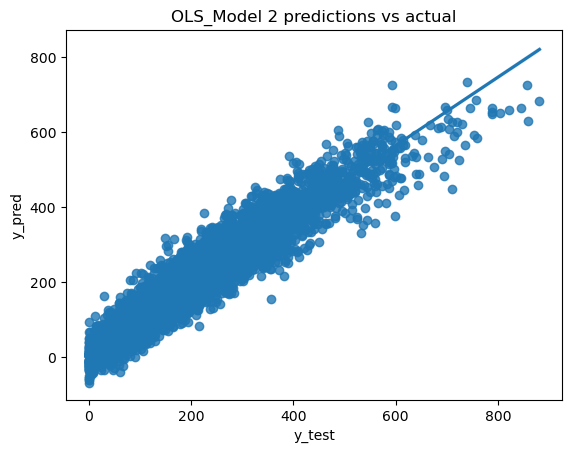

In [60]:
sns.regplot(x=y_test, y=y_pred)
plt.show
plt.title('OLS_Model 2 predictions vs actual')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [61]:
X=df2.drop('SumWaits', axis=1)
y=df2['SumWaits']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [62]:
from sklearn.ensemble import RandomForestRegressor
dtree = RandomForestRegressor(n_estimators = 1000)

In [63]:
dtree.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [64]:
y_pred2 = dtree.predict(X_test)

In [65]:
print('The Mean Squared Error: ' , mean_squared_error(y_test, y_pred2))
print('The Mean Absolute Error: ', mean_absolute_error(y_test, y_pred2))
print('The Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred2)))

The Mean Squared Error:  1580.7529360888554
The Mean Absolute Error:  28.706347981682498
The Root Mean Squared Error:  39.75868378214822


Text(0, 0.5, 'y_pred')

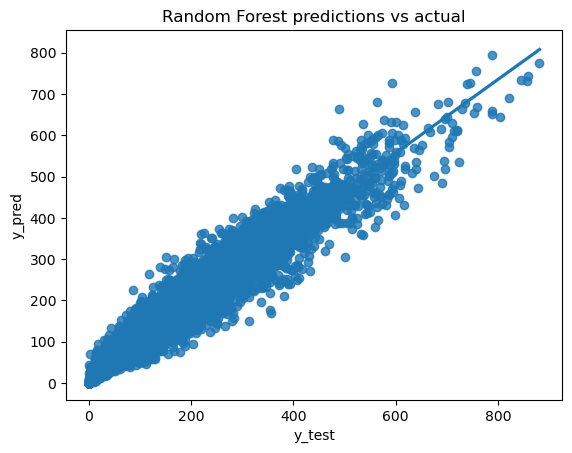

In [66]:
sns.regplot(x=y_test, y=y_pred2)
plt.show
plt.title('Random Forest predictions vs actual')
plt.xlabel('y_test')
plt.ylabel('y_pred')

17


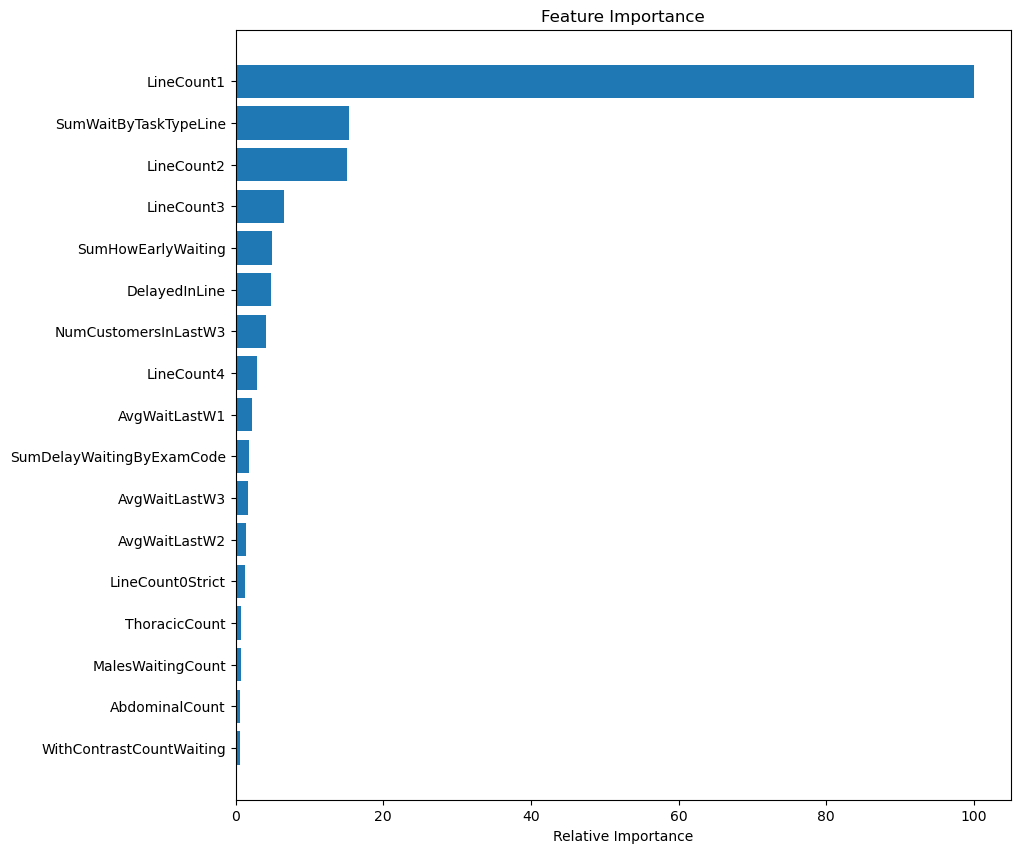

In [69]:
clf = RandomForestRegressor(n_estimators = 1000)
clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()